# <font color=blue> Project 2   |    Abdulbaset ALZHRANI 
</font>


---------------------------------------------------------------------------------------------------

# First step is data and parameters fitting

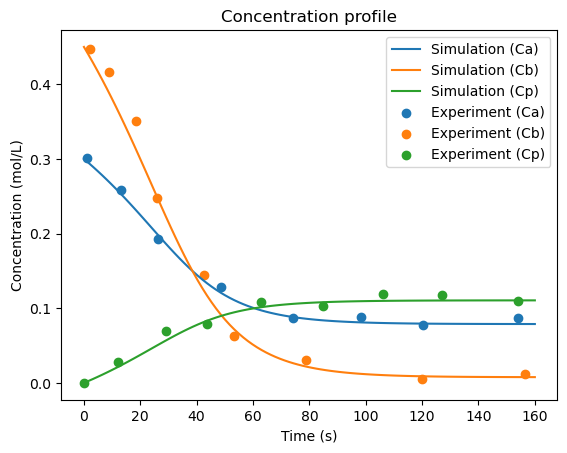

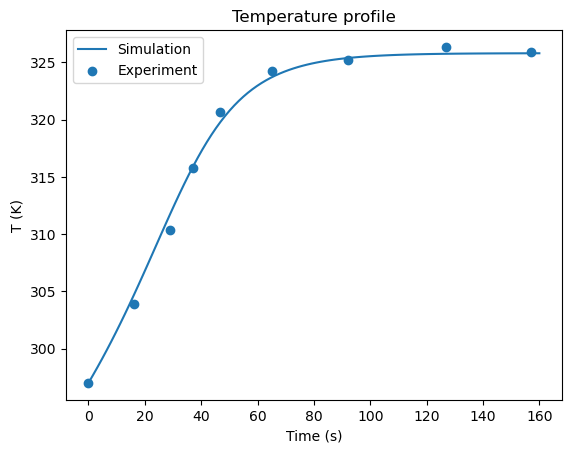

In [76]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math


V = 100  # L
F =  0.1 # L/s
UA = 0.1  # J/sK
roh = 1000  # g/L
dH = 547100  # J/mol
CP = 4.2  # J/gK
ko = 685000000000  # L/(s mol)
E = 76534.704  # J/mol
R = 8.314  # J/(mol K)
Ti = 297  # K
Tj = 250  # K
Cai = 0.3 #mol/l
Cbi = 0.45
Cpi = 0
def f(X, t):
    Ca = X[0]
    Cb = X[1]
    Cp = X[2]
    T = X[3]
    
    alpha = dH/(roh*CP)
    k = ko*math.exp(-E/(R*T))
    dCadt = ((F/V)*(Cai-Ca)) - ((ko*math.exp(-E/(R*T)))*Ca*Cb)
    dCbdt = ((F/V)*(Cbi-Cb)) - (2*(ko*math.exp(-E/(R*T)))*Ca*Cb)
    dCpdt = (F/V)*(Cpi-Cp) + (0.5*k*Ca*Cb)
    dTdt = ((F/V)*(Ti-T)) - ((UA*(T-Tj))/(V*roh*CP)) + (alpha*k*Ca*Cb) 
    return [dCadt, dCbdt, dCpdt, dTdt]


# Initial conditions
X0 = [Cai, Cbi, Cpi, Ti]

t = np.linspace(0, 160, 100)

sol = odeint(f, X0, t)

Ca = sol[:, 0]
Cb = sol[:, 1]
Cp = sol[:, 2]
T = sol[:, 3]


dattem = np.genfromtxt('TemExp2.csv', delimiter=',',skip_header=1)
TimeExp2 = dattem[:, 0]
TExp2 = dattem[:, 1]
cat = dattem[:, 2]
ca = dattem[:, 3]
cbt = dattem[:, 4]
cb = dattem[:, 5]
cppt = dattem[:, 6]
cpp = dattem[:, 7]

# Plots
plt.plot(t, Ca, label='Simulation (Ca)')
plt.plot(t, Cb, label='Simulation (Cb)')
plt.plot(t, Cp, label='Simulation (Cp)')
plt.scatter(cat, ca, label='Experiment (Ca)')
plt.scatter(cbt, cb, label='Experiment (Cb)')
plt.scatter(cppt, cpp, label='Experiment (Cp)')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mol/L)')
plt.title('Concentration profile')
plt.legend()
plt.show()


plt.plot(t, T, label='Simulation')
plt.scatter(TimeExp2, TExp2, label='Experiment')
plt.xlabel('Time (s)')
plt.ylabel('T (K)')
plt.title('Temperature profile')
plt.legend()
plt.show()

# Second step is bifurcation analysis and stability 

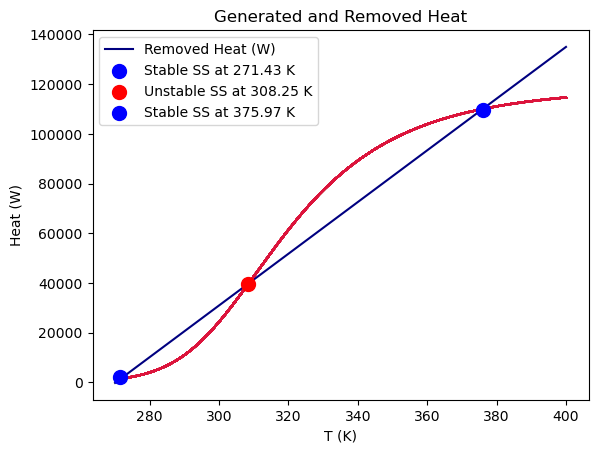

<Figure size 1000x1000 with 0 Axes>

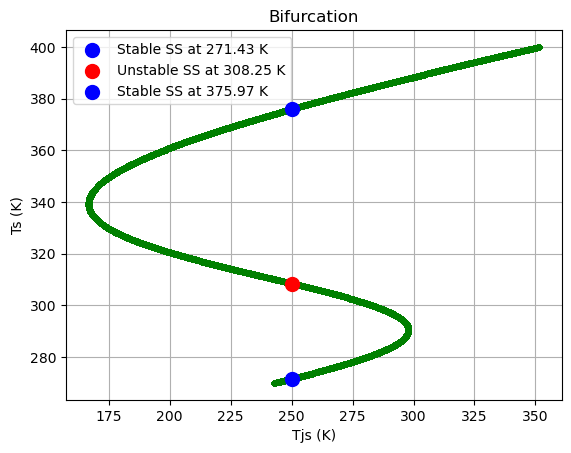

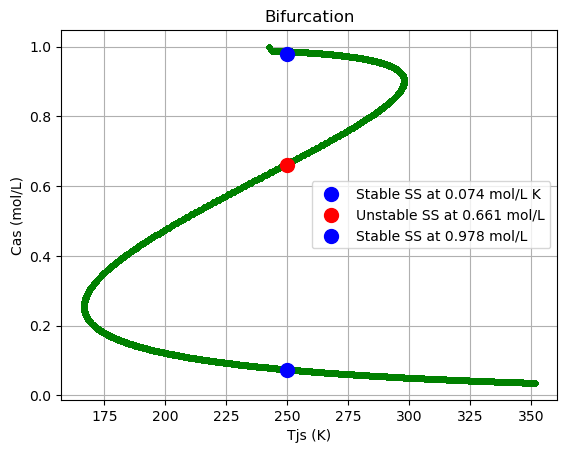

In [121]:
import matplotlib.pyplot as plt
import math

V = 100  # L
F = 20  # L/s
UA = 20000  # J/sK
roh = 1000  # g/L
dH = 596619  # J/mol
Cp = 4.2  # J/gK
ko = 685000000000  # L/(s mol)
E = 76534.704  # J/mol
R = 8.314  # J/(mol K)
Ti = 275  # K
Tj = 250  # K
Cai = 1
Cbi = 2

# Temperature flow rate ranges
T_range = np.linspace(270, 400, 1000)
Fsrange = np.linspace(0, 1000, 1000)

# Calculate Q_gen and Q_rem for each T value
Q_gen = []
Q_rem = []
Tjs = []
Cas = []  

for T in T_range:

    k = ko * np.exp(-E / (R * T))
    Ca = F * Cai / (F + V * k * Cb)
    Cb = F * Cbi / (F + V * 2 * k * Ca)
    Q_gen.append(dH * k * Ca * Cb)
    Q_rem.append((F * roh * Cp / V) * (T - Ti) + ((UA) / (V)) * (T - Tj))
    Tjs.append(T + (((F * roh * Cp * (T - Ti)) - (dH * V * k * Ca * Cb)) / (UA)))
    Cas.append(Ca)


# Plot Q_gen and Q_rem vs T
plt.figure(1)
plt.plot(T_range, Q_rem, label='Removed Heat (W)', color='navy')
plt.plot(T_range, Q_gen, color='crimson')
plt.scatter(271.43, 2002.82, label='Stable SS at 271.43 K', color='blue', s=100, zorder=10)
plt.scatter(308.25, 39673.20, label='Unstable SS at 308.25 K', color='red', s=100, zorder=10)
plt.scatter(375.97, 109469.34, label='Stable SS at 375.97 K', color='blue', s=100, zorder=10)

plt.xlabel('T (K)')
plt.ylabel('Heat (W)')
plt.title('Generated and Removed Heat')
plt.legend()
plt.show() 

plt.figure(figsize=(10, 10))
plt.figure(2)
plt.plot(Tjs, T_range, '.', color='green')
plt.scatter(250, 271.43, label='Stable SS at 271.43 K', color='blue', s=100, zorder=10)
plt.scatter(250, 308.25, label='Unstable SS at 308.25 K', color='red', s=100, zorder=10)
plt.scatter(250, 375.97, label='Stable SS at 375.97 K', color='blue', s=100, zorder=10)
plt.grid(True)
plt.legend()
plt.xlabel('Tjs (K)')
plt.ylabel('Ts (K)')
plt.title('Bifurcation')

plt.figure(3)
plt.plot(Tjs, Cas, '.', color='green')
plt.scatter(250, 0.074, label='Stable SS at 0.074 mol/L K', color='blue', s=100, zorder=10)
plt.scatter(250, 0.661, label='Unstable SS at 0.661 mol/L', color='red', s=100, zorder=10)
plt.scatter(250, 0.978, label='Stable SS at 0.978 mol/L', color='blue', s=100, zorder=10)
plt.grid(True)
plt.legend()
plt.xlabel('Tjs (K)')
plt.ylabel('Cas (mol/L)')
plt.title('Bifurcation')


plt.show()

(0.0, 2.0)

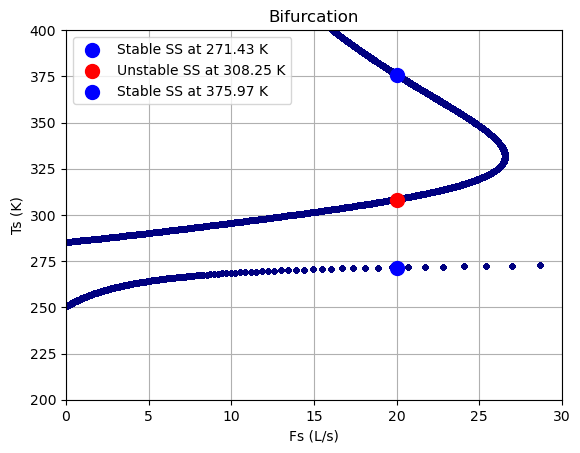

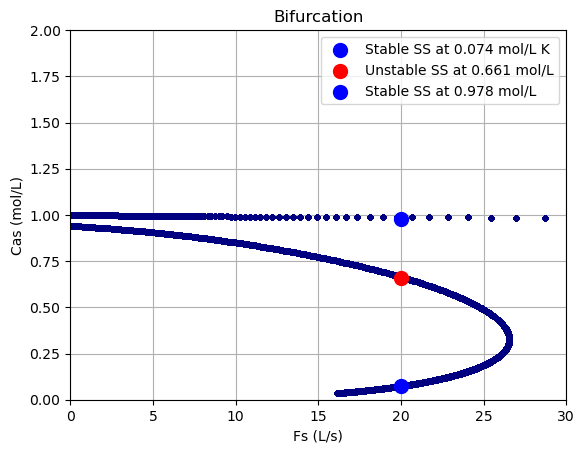

In [112]:

import numpy as np
import matplotlib.pyplot as plt
import math

V = 100  # L
#F = 20  # L/s
UA = 20000  # J/sK
roh = 1000  # g/L
dH = 596619  # J/mol
Cp = 4.2  # J/gK
ko = 685000000000  # L/(s mol)
E = 76534.704  # J/mol
R = 8.314  # J/(mol K)
Ti = 275  # K
Tj = 250  # K
Cai = 1
Cbi = 2

# Temperature range
T_range = np.linspace(250, 400, 1000)

Fs = []
Cas = []  

for T in T_range:

    k = ko * np.exp(-E / (R * T))
    Ca = F * Cai / (F + V * k * Cb)
    Cb = F * Cbi / (F + V * 2 * k * Ca)
    Fs.append( (((Tj-T)*UA)+((dH * V * k * Ca * Cb)))/(roh*Cp*(T-Ti)) )
    Cas.append(Ca)


plt.figure(1)
plt.plot(Fs, T_range,'.', color='navy')
plt.scatter(20, 271.43, label='Stable SS at 271.43 K', color='blue', s=100, zorder=10)
plt.scatter(20, 308.25, label='Unstable SS at 308.25 K', color='red', s=100, zorder=10)
plt.scatter(20, 375.97, label='Stable SS at 375.97 K', color='blue', s=100, zorder=10)
plt.grid(True)
plt.legend()
plt.xlabel('Fs (L/s)')
plt.ylabel('Ts (K)')
plt.title('Bifurcation')
plt.xlim(0, 30)
plt.ylim(200, 400) 

plt.figure(2)
plt.plot(Fs, Cas,'.', color='navy')
plt.scatter(20, 0.074, label='Stable SS at 0.074 mol/L K', color='blue', s=100, zorder=10)
plt.scatter(20, 0.661, label='Unstable SS at 0.661 mol/L', color='red', s=100, zorder=10)
plt.scatter(20, 0.978, label='Stable SS at 0.978 mol/L', color='blue', s=100, zorder=10)
plt.grid(True)
plt.legend()
plt.xlabel('Fs (L/s)')
plt.ylabel('Cas (mol/L)')
plt.title('Bifurcation')
plt.xlim(0, 30)
plt.ylim(0, 2) 

In [63]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

V = 100  # L
F = 20  # L/s
UA = 20000  # J/sK
roh = 1000  # g/L
dH = 596619  # J/mol
Cp = 4.2  # J/gK
ko = 685000000000  # L/(s mol)
E = 76534.704  # J/mol
R = 8.314  # J/(mol K)
Ti = 275  # K
Tj = 250  # K
Cai = 1

def f(X, t):
    Ca = X[0]
    T = X[1]
    
    alpha = dH/(roh*Cp)
    k = ko*math.exp(-E/(R*T))
    dCadt = ((F/V)*(Cai-Ca)) - ((ko*math.exp(-E/(R*T)))*2*Ca**2)
    dTdt = ((F/V)*(Ti-T)) - ((UA*(T-Tj))/(V*roh*Cp)) + (alpha*k*2*Ca*2) 
    return [dCadt, dTdt]

# Initial conditions
X0 = [Cai, Ti]

t = np.linspace(0, 160, 100)

sol = odeint(f, X0, t)

# Steady-state point
Ca_ss = 0.666
T_ss = 308.2

# Jacobian matrix
def jacobian(X_ss):
    Ca = X_ss[0]
    T = X_ss[1]
    
    alpha = dH/(roh*Cp)
    k = ko*math.exp(-E/(R*T))
    
    dCadt_Ca = -((F/V) + 2*ko*math.exp(-E/(R*T))*2*Ca)  # Partial derivative of dCadt with respect to Ca
    dCadt_T = 0  # Partial derivative of dCadt with respect to T
    dTdt_Ca = -((alpha*k*4*Ca) / (R*T**2))  # Partial derivative of dTdt with respect to Ca
    dTdt_T = -(F/V) - (UA/(V*roh*Cp)) + (alpha*k*4*Ca**2)  # Partial derivative of dTdt with respect to T
    
    return np.array([[dCadt_Ca, dCadt_T], [dTdt_Ca, dTdt_T]])

# Calculate Jacobian matrix at steady-state point
J = jacobian([Ca_ss, T_ss])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(J)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)


Eigenvalues: [18.17503513 -0.3947288 ]
Eigenvectors: [[0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.88623717e-06]]


# Third step is global sensitivity analysis

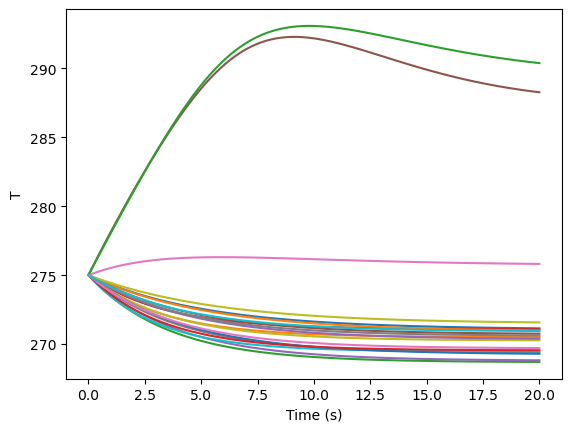

In [140]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def func(X, t, V, F, UA, roh, dH, CP, ko, E, R, Cai, Tj):
    Ca, T = X
    
    alpha = dH / (roh * CP)
    k = ko * math.exp(-E / (R * T))
    
    dCadt = ((F / V) * (Cai - Ca)) - (k * 2 * Ca **2)
    dTdt = ((F / V) * (Ti - T)) - (UA * (T - Tj)) / (V * roh * CP) + (alpha * k * 2 * Ca**2)
    
    return [dCadt, dTdt]

timesteps = np.linspace(0, 20, 100)

N = 20
V = np.random.uniform(100 * 0.8, 100 * 1.2, N)
F = np.random.uniform(20 * 0.8, 20 * 1.2, N)
UA = np.random.uniform(20000 * 0.8, 20000 * 1.2, N)
roh = np.random.uniform(1000 * 0.8, 1000 * 1.2, N)
dH = np.random.uniform(596619 * 0.8, 596619 * 1.2, N)
CP = np.random.uniform(4.2 * 0.8, 4.2 * 1.2, N)
ko = np.random.uniform(685000000000 * 0.8, 685000000000 * 1.2, N)
E = np.random.uniform(76534.704 * 0.8, 76534.704 * 1.2, N)
Tj = np.random.uniform(250 * 0.8, 250 * 1.2, N)
R = 8.314
Cai = 0.3
Ti = 275  # K
Tj_new = 250  # K

X0 = [Cai, Ti]

T = np.zeros(N)

for m in np.arange(0, N, 1):
    output = odeint(func, X0, timesteps, args=(V[m], F[m], UA[m], roh[m], dH[m], CP[m], ko[m], E[m], R, Cai, Tj_new))
    
    plt.plot(timesteps, output[:, 1])
    plt.xlabel("Time (s)")
    plt.ylabel("T")
    T[m] = output[-1, 1]

plt.show()


### The sensitivity analysis was performed for those parameters: V, F, UA, roh, dH, CP, ko, E, and Tj